In [44]:
import re
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename

In [45]:
def parse_log(log_path):
    timings = {'C': [], 'PY': [], 'PYNQ': []}
    with open(log_path, 'r') as f:
        for line in f:
            match = re.match(r'\[(C|PY|PYNQ)\]\s+(\S+):\s+([0-9.]+)\s+seconds', line)
            if match:
                lang, name, time = match.groups()
                timings[lang].append((name, float(time)))
    return timings

In [46]:
def plot_timings(timings, log_file):
    fig, ax = plt.subplots()
    color_map = {
        'C': 'skyblue',
        'PY': 'lightgreen',
        'PYNQ': 'tomato'
    }

    file_labels = []
    time_values = []
    colors = []

    for lang, items in timings.items():
        for name, val in items:
            file_labels.append(name)
            time_values.append(val)
            colors.append(color_map.get(lang, 'gray'))

    ax.barh(file_labels, file_labels, color=colors)
    ax.set_xlabel('Execution Time (seconds)')
    ax.set_title(f'Timing Comparison of Programs: {log_file}')

    plt.tight_layout()
    plt.show()

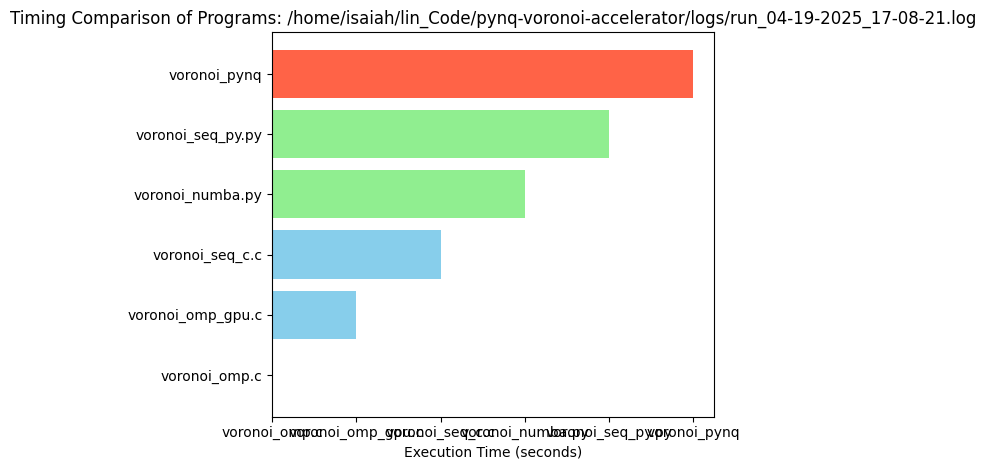

In [47]:
log_file = askopenfilename(initialdir="../../logs")
timing_data = parse_log(log_file)
plot_timings(timing_data, log_file)